# Paket Prabayar Mana Yang Menghasilkan Lebih Banyak Pendapatan?

# Konten <a id='back'></a>

* [Pendahuluan](#intro)
    * [Tujuan](#tujuan)
    * [Tahapan](#tahap)
* [Tahap 1: Memuat Data](#data1)
    * [Memuat Library](#lib)
    * [Memuat Data](#data2)
* [Tahap 2: Eksplorasi data](#explore)
    * [Dataset Calls](#call)
    * [Dataset Internet](#internet)
    * [Dataset Messages](#messages)
    * [Dataset Plans](#plan)
    * [Dataset Users](#user)
    * [Temuan](#find)
* [Tahap 3: Pra-pemrosesan data](#pra)
    * [Total waktu panggilan yang digunakan per bulan](#call_month)
    * [Jumlah SMS yang dikirim per bulan](#sms_month)
    * [Volume data yang digunakan per bulan](#internet_month)
    * [Pendapatan bulanan dari setiap pengguna](#charge1)
        * [Menggabungkan Seluruh *Dataset*](#merge)
        * [Membersihkan Data](#clean)
        * [Menghitung Pendapatan Bulanan dari Setiap Pengguna](#charge2)
    * [Kesimpulan Sejauh Ini](#con1)
* [Tahap 4: Menganalisis Data](#analysis)
    * [Distribusi Tiap Paket Data](#dis)
        * [Distribusi Durasi Panggilan](#dis_call)
        * [Distribusi Volume Data Seluler](#dis_internet)
        * [Distribusi Jumlah SMS](#dis_sms)
    * [5.2 Varians, Rata-rata, dan Standar Deviasi](#var)
        * [Varians, Rata-rata, dan Standar Deviasi Panggilan](#var_call)
        * [Varians, Rata-rata, dan Standar Deviasi Volume Data](#var_internet)
        * [Varians, Rata-rata, dan Standar Deviasi SMS](#var_sms)
    * [Kesimpulan](#con2)
* [Tahap 5: Menguji Hipotesis](#hip) 
    * [Hipotesis 1](#hip1)
    * [Hipotesis 2](#hip2)
* [Kesimpulan Umum](#end)

## Pendahuluan <a id='intro'></a>

Analisa kali ini membahas tentang dua paket prabayar yang ditawarkan oleh operator telekomunikasi Megaline, yaitu Surf dan Ultimate. Departemen periklanan Megaline ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan untuk menyesuaikan anggaran iklan mereka. Untuk mencapai tujuan ini, kita akan menganalisis perilaku klien dengan fokus pada penggunaan paket prabayar mereka dan menentukan paket mana yang mendatangkan lebih banyak pendapatan. Analisis ini akan dilakukan dengan mempertimbangkan berbagai faktor, termasuk penggunaan data, panggilan, pesan teks, dan biaya langganan. Dengan demikian, laporan ini akan memberikan wawasan yang berharga kepada Megaline dalam mengambil keputusan terkait strategi pemasaran dan peningkatan pendapatan.

**Deskripsi Paket Prabayar**

Megaline membulatkan detik ke menit, serta membulatkan megabita ke gigabita. Untuk panggilan, setiap panggilan individual dibulatkan ke atas: bahkan jika panggilan tersebut berlangsung hanya satu detik, ia akan dihitung sebagai satu menit. Untuk lalu lintas web, setiap sesi web tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan dibulatkan ke atas. Jika seorang pengguna menghabiskan 1025 megabita bulan ini, maka ia akan dikenai biaya untuk 2 gigabita.

<u>**Surf**</u>

1. Biaya bulanan: `$20`
2. `500` menit durasi panggilan per bulan, `50` SMS, dan `15` GB data
3. Setelah melebihi batas paket, akan dikenakan
    - 1 menit: `3 sen`
    - 1 SMS: `3 sen`
    - 1 GB data: `$10`

<u>**Ultimate**</u>

1. Biaya bulanan: `$70`
2. `3000` menit durasi panggilan per bulan, `1000` SMS, dan `30` GB data
3. Setelah melebihi batas paket, akan dikenakan:
    - 1 menit: `1 sen`
    - 1 SMS: `1 sen`
    - 1 GB data: `$7`

### Tujuan: <a id='tujuan'></a>

Tujuan utama adalah untuk mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan. Untuk menjawab pertanyaan tersebut penting untuk mengetahui beberapa hal berikut:

1. Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan.
2. Jumlah SMS yang dikirim per bulan.
3. Volume data per bulan.
4. Pendapatan bulanan dari setiap pengguna.

Selanjutnya perlu juga dilakukan pengujian **hipotesis** berikut:

1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
2. Rata-rata rating pengguna genre Action dan Sports berbeda.

### Tahapan: <a id='tahap'></a>
 
Proyek ini akan terdiri dari 5 tahap:
 1. Memuat data
 2. Eksplorasi data
 3. Pra-pemrosesan data
 4. Menganalisis data
 5. Menguji hipotesis

## Tahap 1: Memuat Data <a id='data1'></a>

### Memuat Library <a id='lib'></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st

import warnings

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

### Memuat Data <a id='data2'></a>

In [2]:
#File path

path_calls = '/datasets/megaline_calls.csv'
path_internet = '/datasets/megaline_internet.csv'
path_messages = '/datasets/megaline_messages.csv'
path_plans = '/datasets/megaline_plans.csv'
path_users = '/datasets/megaline_users.csv'

In [3]:
df_calls = pd.read_csv(path_calls)
df_internet = pd.read_csv(path_internet)
df_messages = pd.read_csv(path_messages)
df_plans = pd.read_csv(path_plans)
df_users = pd.read_csv(path_users)

##  Tahap 2: Eksplorasi Data  <a id='explore'></a>

### Dataset Calls <a id='call'></a>

Tabel `df_calls` (data panggilan) berisi kolom-kolom berikut:

- `id` — ID sesi web unik
- `call_date` — tanggal panggilan
- `duration` — durasi panggilan (dalam menit)
- `user_id` — ID pengguna yang melakukan panggilan

In [4]:
# Memeriksa 5 data teratas

df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
# Melihat informasi umumya

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [7]:
# Memeriksa apakah ada data yang terduplikasi

df_calls.duplicated().sum()

0

**Kesimpulan yang didapat:**
- Tipe data kolom `call_date` belum sesuai.
- `duration` belum dibulatkan ke atas sebagaimana mestinya.
- Pada kolom `duration` masih terdapat nilai 0 yang mana mungkin adalah panggilan tak terjawab.
- Belum ada kolom yang menunjukan jumlah menit yang digunakan user selama selama sebulan.

### Dataset Internet <a id='internet'></a>

Tabel `df_internet` (data sesi web) berisi kolom-kolom berikut:

- `id` — ID sesi web unik
- `mb_used` — volume data yang dihabiskan selama sesi (dalam megabita)
- `session_date` — tanggal sesi web
- `user_id` — ID pengguna

In [8]:
# Memeriksa 5 data teratas

df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [9]:
# Melihat informasi umumya

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [10]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [11]:
# Memeriksa apakah ada data yang terduplikasi

df_internet.duplicated().sum()

0

**Kesimpulan yang didapat:**
- Tipe data kolom `session_date` belum sesuai.
- Belum ada kolom yang menunjukan jumlah volume data (megabita) yang dihabiskan user selama selama sebulan.

### Dataset Messages <a id='messages'></a>

Tabel `df_messages` (data SMS) berisi kolom-kolom berikut:

- `id` — ID SMS unik
- `message_date` — tanggal SMS dikirim
- `user_id` — ID pengguna yang mengirim SMS

In [12]:
# Memeriksa 5 data teratas

df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [13]:
# Melihat informasi umumya

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [15]:
# Memeriksa apakah ada data yang terduplikasi

df_messages.duplicated().sum()

0

**Kesimpulan yang didapat:**
- Tipe data kolom `message_date` belum sesuai.

### Dataset Plans <a id='plan'></a>

Tabel `df_plans` (data paket telepon) berisi kolom-kolom berikut:

- `plan_name` — nama paket telepon
- `usd_monthly_fee` — biaya bulanan dalam dolar AS
- `minutes_included` — alokasi menit panggilan bulanan
- `messages_included` — alokasi SMS bulanan
- `mb_per_month_included` — alokasi volume data bulanan (dalam megabita)
- `usd_per_minute` — harga per menit jika telah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
- `usd_per_message` — harga per SMS jika telah melebihi batas alokasi paket
- `usd_per_gb` — harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita)

In [16]:
# Memeriksa 5 data teratas

df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [17]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


**Kesimpulan yang didapat:**
- Dataset `df_plans` berisikan informasi dari masing-masing paket prabayar.

### Dataset Users <a id='user'></a>

Tabel `df_users` (data pengguna) berisi kolom-kolom berikut:

- `user_id` — ID pengguna
- `first_name` — nama depan pengguna
- `last_name` — nama belakang pengguna
- `age` — usia pengguna (tahun)
- `reg_date` — tanggal mulai berlangganan (dd, mm, yy)
- `churn_date` — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat)
- `city` — kota tempat tinggal pengguna
- `plan` — nama paket telepon

In [18]:
# Memeriksa 5 data teratas

df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [19]:
# Melihat informasi umumya

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [20]:
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [21]:
# Memeriksa apakah ada data yang terduplikasi

df_users.duplicated().sum()

0

**Kesimpulan yang didapat:**
- Tipe data kolom `reg_date` belum sesuai.

### Temuan <a id='find'></a>

- Semua tipe data dari kolom yang berisikan informasi waktu belum sesuai.
- Kolom `duration` pada *Dataset* `df_calls` perlu dibulatkan ke atas sebagaimana mestinya, dan juga belum ada kolom yang menunjukan jumlah menit yang digunakan user selama selama sebulan.
- Pada *Dataset* `df_internet` perlu dibuatkan kolom baru yang menunjukan jumlah volume data (megabita) yang dihabiskan user selama selama sebulan.

## Tahap 3: Pra-pemrosesan Data <a id='pra'></a>

Pada tahap ini kita akan menyiapkan datanya untuk kemudian dianalisa lebih lanjut.

### Total waktu panggilan yang digunakan per bulan <a id='call_month'></a>

In [22]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [23]:
# Mengubah tipe data `message_date`

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

In [24]:
# Membuat kolom yang hanya berisikan informasi bulan dan tahun

df_calls['year_month'] = df_calls['call_date'].dt.to_period('M')

In [25]:
# Melakukan pembulatan ke atas kolom `duration`

df_calls['duration_round'] = df_calls['duration'].apply(np.ceil).astype('int')

In [26]:
# Membuat aggregasi

df_calls_agg = df_calls.groupby(['user_id', 'year_month']).agg({'duration_round' : 'sum'}).reset_index()

In [27]:
# Melihat hasilnya
df_calls_agg

,user_id,year_month,duration_round
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426
...,...,...,...
2253,1498,2018-12,339
2254,1499,2018-09,346
2255,1499,2018-10,385
2256,1499,2018-11,308


Kolom `duration_round` yang berisi total panggilan yang dilakukan tiap pengguna perbulan telah dibuat dengan menggabungkan semua panggilan masing-masing pengguna tiap bulannya.

### Jumlah SMS yang dikirim per bulan <a id='sms_month'></a>

In [28]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [29]:
# Mengubah tipe data `message_date`

df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

In [30]:
# Membuat kolom yang hanya berisikan informasi bulan dan tahun

df_messages['year_month'] = df_messages['message_date'].dt.to_period('M')

In [31]:
# Membuat dataset aggregasi 

df_messages_agg = df_messages.groupby(['user_id', 'year_month']).agg({'id' : 'count'}).reset_index()

In [32]:
# Mengganti nama kolom `id` menjadi `messages_count`

df_messages_agg.rename(columns={'id' : 'messages_count'}, inplace=True)

In [33]:
# Melihat hasilnya

df_messages_agg

,user_id,year_month,messages_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


Kolom `messages_count` yang berisi total SMS yang dilakukan tiap pengguna perbulan telah dibuat dengan menggabungkan semua SMS masing-masing pengguna tiap bulannya.

### Volume data yang digunakan per bulan <a id='internet_month'></a>

In [34]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [35]:
# Mengubah tipe data `session_date`

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

In [36]:
# Membuat kolom yang hanya berisikan informasi bulan dan tahun

df_internet['year_month'] = df_internet['session_date'].dt.to_period('M')

In [37]:
# Membuat dataset aggregasi 

df_internet_agg = df_internet.groupby(['user_id', 'year_month']).agg({'mb_used' : 'sum'}).reset_index()

In [38]:
# Mengkonversi megabita menjadi gigabita

df_internet_agg['gb_used'] = df_internet_agg['mb_used'] / 1024

In [39]:
# Melakukan pembulatan ke atas pada kolom `gb_used`

df_internet_agg['gb_used_round'] = df_internet_agg['gb_used'].apply(np.ceil).astype('int')

In [40]:
# Melihat hasilnya

df_internet_agg

,user_id,year_month,mb_used,gb_used,gb_used_round
0,1000,2018-12,1901.47,1.856904,2
1,1001,2018-08,6919.15,6.756982,7
2,1001,2018-09,13314.82,13.002754,14
3,1001,2018-10,22330.49,21.807119,22
4,1001,2018-11,18504.30,18.070605,19
...,...,...,...,...,...
2272,1498,2018-12,23137.69,22.595400,23
2273,1499,2018-09,12984.76,12.680430,13
2274,1499,2018-10,19492.43,19.035576,20
2275,1499,2018-11,16813.83,16.419756,17


Kolom `gb_used_round` yang berisi total volume data yang digunakan tiap pengguna perbulan telah dibuat dengan menggabungkan semua volume data masing-masing pengguna tiap bulannya.

### Pendapatan bulanan dari setiap pengguna <a id='charge1'></a>

Untuk mengetahui pendapatan bulanan dari setiap pengguna, perlu dilakukan penggabungan *dataset* agar proses penghitungan dapat dilakukan lebih mudah.

#### Menggabungkan Seluruh *Dataset*  <a id='merge'></a>

In [41]:
# Menggabungkan Dataset `df_user` dan `df_plans`
df_merge = pd.merge(df_users, df_plans, left_on='plan', right_on='plan_name')

# Menggabungkan Dataset `df_merge` dan `df_calls_agg`
df_merge = pd.merge(df_merge, df_calls_agg, on=['user_id'], how='inner')

# Menggabungkan Dataset `df_merge` dan `df_internet_agg`
df_merge = pd.merge(df_merge, df_internet_agg, on=['user_id', 'year_month'], how='outer')

# Menggabungkan Dataset `df_merge` dan `df_internet_agg`
df_merge = pd.merge(df_merge, df_messages_agg, on=['user_id', 'year_month'], how='outer')

In [42]:
df_merge.sort_values(['user_id', 'year_month'])

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,year_month,duration_round,mb_used,gb_used,gb_used_round,messages_count
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-12,124.0,1901.47,1.856904,2.0,11.0
713,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,2018-08,182.0,6919.15,6.756982,7.0,30.0
714,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,2018-09,315.0,13314.82,13.002754,14.0,44.0
715,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,2018-10,393.0,22330.49,21.807119,22.0,53.0
716,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,2018-11,426.0,18504.30,18.070605,19.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,Scot,Williamson,51.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,2018-12,339.0,23137.69,22.595400,23.0,NaN
2254,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,2018-09,346.0,12984.76,12.680430,13.0,NaN
2255,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,2018-10,385.0,19492.43,19.035576,20.0,NaN
2256,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,surf,2018-11,308.0,16813.83,16.419756,17.0,NaN


Semua *dataset* telah digabungkan.

#### Membersihkan Data <a id='clean'></a>

Setelah menggabungkan datanya, perlu dilakukan pembersihan agar datanya rapih.

**Pertama kolom `city` perlu dirapihkan:**

Dikarenakan salah satu hipotesis adalah membandingkan wilayah NY-NJ dengan wilayah lainnya, maka kolom `city` perlu dirapihkan. Selanjutnya perlu dilakukan *flagging* bagi data yang berisikan wilayah tersebut.

In [43]:
# Membersihkan kolom `city`
df_merge['clean_city'] = df_merge['city'].str.split(', ').str[1]
df_merge['clean_city'] = df_merge['clean_city'].str.replace(' MSA', '')

# Flagging data yang berisi wilayah `NY-NJ`
df_merge['is_ny_nj'] = df_merge['clean_city'].str.contains('NY-NJ', regex=True)

# Memeriksa hasilnya
df_merge.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,year_month,duration_round,mb_used,gb_used,gb_used_round,messages_count,clean_city,is_ny_nj
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-12,124.0,1901.47,1.856904,2.0,11.0,GA,False
1,1006,Jesusa,Bradford,73.0,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-11,10.0,2068.37,2.019893,3.0,15.0,CA,False
2,1006,Jesusa,Bradford,73.0,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-12,59.0,32118.82,31.366035,32.0,139.0,CA,False
3,1008,Emely,Hoffman,53.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-10,476.0,17106.99,16.706045,17.0,21.0,FL,False
4,1008,Emely,Hoffman,53.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-11,446.0,23676.72,23.121797,24.0,37.0,FL,False


Data dengan wilayang NY-NJ telah berhasil diflagging.

**Kedua perlu dilakukan pengkonversian megabita menjadi gigabita:**

In [44]:
# Mengkonversi megabita menjadi gigabita

df_merge['gb_per_month_included'] = df_merge['mb_per_month_included'] / 1024

**Selanjutnya menghapus kolom yang tidak digunakan:**

Kolom yang tidak digunakan akan dihapus agar mempermudah proses analisa data.

In [45]:
# Mengeliminasi kolom yang tidak digunakan

df_merge = df_merge.drop(columns=[
    'first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date', 'mb_per_month_included', 'mb_used', 'gb_used'
])

**Mengganti nama kolom**

Nama kolom diganti dengan nama yang lebih singkat dan lebih mencerminkan isinya.

In [46]:
# Mengganti nama kolom

df_merge.rename(
    columns={'messages_count' : 'sms_used', 
             'duration_round' : 'minute_used', 
             'gb_used_round' : 'gb_used',
             'clean_city' : 'city',
             'messages_included' : 'sms_included',
             'usd_per_message' : 'usd_per_sms',
             'gb_per_month_included' : 'gb_included'}, inplace=True
)

**Terakhir, memastikan apakah ada nilai yang hilang:**

In [47]:
# Memastikan nilai yang hilang

df_merge.isnull().sum()

user_id               0
plan                 35
sms_included         35
minutes_included     35
usd_monthly_pay      35
usd_per_gb           35
usd_per_sms          35
usd_per_minute       35
plan_name            35
year_month            0
minute_used          35
gb_used              16
sms_used            487
city                 35
is_ny_nj             35
gb_included          35
dtype: int64

Terdapat beberapa data yang hilang.

In [48]:
# Memfilter data yang hilang

df_merge.loc[(df_merge['plan'].isna())].sample(10)

,user_id,plan,sms_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_sms,usd_per_minute,plan_name,year_month,minute_used,gb_used,sms_used,city,is_ny_nj,gb_included
2291,1361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05,NaN,2.0,2.0,NaN,NaN,NaN
2261,1080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10,NaN,30.0,59.0,NaN,NaN,NaN
2283,1194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12,NaN,31.0,56.0,NaN,NaN,NaN
2272,1131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,NaN,16.0,26.0,NaN,NaN,NaN
2266,1121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11,NaN,2.0,1.0,NaN,NaN,NaN
2292,1482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10,NaN,NaN,2.0,NaN,NaN,NaN
2281,1194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10,NaN,31.0,88.0,NaN,NaN,NaN
2269,1131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06,NaN,15.0,27.0,NaN,NaN,NaN
2276,1137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10,NaN,7.0,48.0,NaN,NaN,NaN
2268,1131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05,NaN,7.0,18.0,NaN,NaN,NaN


Dapat dilihat semua kolom dengan nilai hilang yang berjumlah `35` memiliki nilai yang hilang di kolom yang sama kecuali kolom `minute_used`, `gb_used`, dan `sms_used`.

In [49]:
# Menghitung presentase nilai yang hilang

df_merge.isnull().sum() / len(df_merge)

user_id             0.000000
plan                0.015264
sms_included        0.015264
minutes_included    0.015264
usd_monthly_pay     0.015264
usd_per_gb          0.015264
usd_per_sms         0.015264
usd_per_minute      0.015264
plan_name           0.015264
year_month          0.000000
minute_used         0.015264
gb_used             0.006978
sms_used            0.212386
city                0.015264
is_ny_nj            0.015264
gb_included         0.015264
dtype: float64

Presentase nilai hilang cukup kecil, degan begitu kolom dengan nilai hilang yang seragam tersebut dapat dihapus dan sisanya akan digantikan nilainya dengan `0`.

In [50]:
# Mengisi nilai yang hilang dengan nilai 0

df_merge[['minute_used', 'gb_used', 'sms_used']] = df_merge[['minute_used', 'gb_used', 'sms_used']].fillna(0)

In [51]:
# Menghapus data yang hilang

df_merge = df_merge.dropna()

Memastikan apakah masih ada nilai yang hilang

In [52]:
df_merge.isnull().sum()

user_id             0
plan                0
sms_included        0
minutes_included    0
usd_monthly_pay     0
usd_per_gb          0
usd_per_sms         0
usd_per_minute      0
plan_name           0
year_month          0
minute_used         0
gb_used             0
sms_used            0
city                0
is_ny_nj            0
gb_included         0
dtype: int64

Melihat hasinya:

In [53]:
df_merge

,user_id,plan,sms_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_sms,usd_per_minute,plan_name,year_month,minute_used,gb_used,sms_used,city,is_ny_nj,gb_included
0,1000,ultimate,1000.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-12,124.0,2.0,11.0,GA,False,30.0
1,1006,ultimate,1000.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-11,10.0,3.0,15.0,CA,False,30.0
2,1006,ultimate,1000.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-12,59.0,32.0,139.0,CA,False,30.0
3,1008,ultimate,1000.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-10,476.0,17.0,21.0,FL,False,30.0
4,1008,ultimate,1000.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-11,446.0,24.0,37.0,FL,False,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,surf,50.0,500.0,20.0,10.0,0.03,0.03,surf,2018-12,339.0,23.0,0.0,NY-NJ-PA,True,15.0
2254,1499,surf,50.0,500.0,20.0,10.0,0.03,0.03,surf,2018-09,346.0,13.0,0.0,FL,False,15.0
2255,1499,surf,50.0,500.0,20.0,10.0,0.03,0.03,surf,2018-10,385.0,20.0,0.0,FL,False,15.0
2256,1499,surf,50.0,500.0,20.0,10.0,0.03,0.03,surf,2018-11,308.0,17.0,0.0,FL,False,15.0


Dengan ini *Dataset* telah bersih.

#### Menghitung Pendapatan Bulanan dari Setiap Pengguna <a id='charge2'></a>

Untuk menghitung pendapatan bulanan dari setiap pengguna, kita perlu menghitung biaya tambahan yang dikelurkan setiap pelanggan. Maka diperlukan sebuah fungsi sebagai berikut agar dapat mempermudah prosesnya:

In [54]:
def extra_charge (value, max_value, cost_extra):
    extra_value = value - max_value
    if extra_value > 0:
        return cost_extra * extra_value
    else:
        return 0

**Menerapkan fungsi:**

In [55]:
# Menghitung biaya tambahan data panggilan

df_merge['call_charge'] = df_merge.apply(
    lambda row: extra_charge(value=row['minute_used'], max_value=row['minutes_included'], cost_extra=row['usd_per_minute']),
    axis=1
)

In [56]:
# Menghitung biaya tambahan data internet

df_merge['internet_charge'] = df_merge.apply(
    lambda row: extra_charge(value=row['gb_used'], max_value=row['gb_included'], cost_extra=row['usd_per_gb']),
    axis=1
)

In [57]:
# Menghitung biaya tambahan data SMS

df_merge['sms_charge'] = df_merge.apply(
    lambda row: extra_charge(value=row['sms_used'], max_value=row['sms_included'], cost_extra=row['usd_per_sms']),
    axis=1
)

In [58]:
# Menghitung total tagihan tambahan yang dibayarkan setiap pelanggan per bulan

df_merge['total_extra_charge'] = df_merge['internet_charge'] + df_merge['sms_charge'] + df_merge['call_charge']

In [59]:
# Menghitung total tagihan yang dibayarkan setiap pelanggan per bulan

df_merge['total_charge'] = df_merge['usd_monthly_pay'] + df_merge['total_extra_charge']

In [60]:
df_merge.sample(10)

,user_id,plan,sms_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_sms,usd_per_minute,plan_name,year_month,minute_used,gb_used,sms_used,city,is_ny_nj,gb_included,call_charge,internet_charge,sms_charge,total_extra_charge,total_charge
1059,1109,surf,50.0,500.0,20.0,10.0,0.03,0.03,surf,2018-10,602.0,11.0,0.0,NY-NJ-PA,True,15.0,3.06,0.0,0.00,3.06,23.06
1205,1153,surf,50.0,500.0,20.0,10.0,0.03,0.03,surf,2018-11,659.0,17.0,0.0,CT,False,15.0,4.77,20.0,0.00,24.77,44.77
1463,1241,surf,50.0,500.0,20.0,10.0,0.03,0.03,surf,2018-10,736.0,10.0,41.0,VA,False,15.0,7.08,0.0,0.00,7.08,27.08
636,1456,ultimate,1000.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-07,652.0,14.0,35.0,MN-WI,False,30.0,0.00,0.0,0.00,0.00,70.00
1183,1147,surf,50.0,500.0,20.0,10.0,0.03,0.03,surf,2018-09,564.0,36.0,18.0,HI,False,15.0,1.92,210.0,0.00,211.92,231.92
362,1246,ultimate,1000.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-09,321.0,8.0,8.0,FL,False,30.0,0.00,0.0,0.00,0.00,70.00
1430,1223,surf,50.0,500.0,20.0,10.0,0.03,0.03,surf,2018-12,546.0,25.0,31.0,AZ,False,15.0,1.38,100.0,0.00,101.38,121.38
942,1076,surf,50.0,500.0,20.0,10.0,0.03,0.03,surf,2018-09,364.0,23.0,145.0,NY,False,15.0,0.00,80.0,2.85,82.85,102.85
405,1279,ultimate,1000.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-12,479.0,16.0,19.0,LA,False,30.0,0.00,0.0,0.00,0.00,70.00
779,1022,surf,50.0,500.0,20.0,10.0,0.03,0.03,surf,2018-10,574.0,19.0,0.0,NY-NJ-PA,True,15.0,2.22,40.0,0.00,42.22,62.22


Biaya tambahan dari tiap kategori telah dihitung, begitu pula dengan total biaya tambahan dan total keseluruhan tagihan tiap pelanggan per bulannya.

### Kesimpulan Sejauh Ini <a id='con1'></a>

Keseluruhan *dataset* telah digabungkan dan dibersihkan dengan merapihkan kolom `city` dan membuat *flagging* bagi data yang berisikan wilayah NY-NJ, mebuang kolom yang tidak digunakan, dan mengkonversi megabita menjadi gigabita. Selain itu data yang bermasalah telah diperbaiki dengan mengganti kolom `minute_used`, `gb_used`, dan `sms_used` dengan nilai nol `0` dan membuang sebagian keci data pada kolom sisanya. Kemudian pendapatan bulanan tiap pengguna telah berhasil dihitung dengan menghitung biaya tambahan dari tiap kategori.

Dengan ini *dataset* telah siap untuk masuk ke tahap selanjutnya, yaitu tahap analisa.

## Tahap 4: Menganalisis Data <a id='analysis'></a>

Untuk mempermudah proses analisa kita perlu membagi *dataset* berdasarkan jenis paket datanya.

In [61]:
# Membagi data berdasarkan jenis paket datanya

surf = df_merge.loc[(df_merge['plan'] == 'surf')].reset_index()
ultimate = df_merge.loc[(df_merge['plan'] == 'ultimate')].reset_index()

### Distribusi Tiap Paket Data <a id='dis'></a>

#### Distribusi Durasi Panggilan <a id='dis_call'></a>

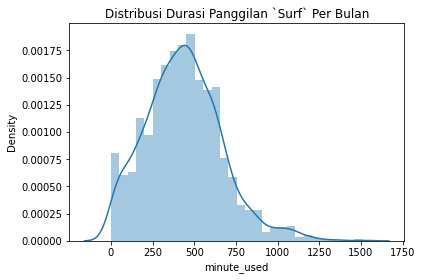

In [62]:
# Distribusi jumlah panggilan dalam menit

plt.title('Distribusi Durasi Panggilan `Surf` Per Bulan')
sns.distplot(surf['minute_used']);
plt.show()

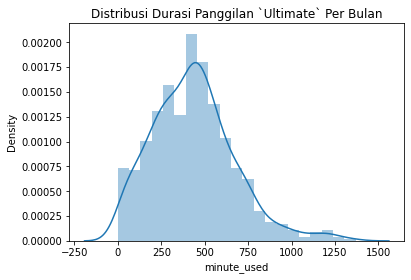

In [63]:
# Distribusi jumlah panggilan dalam menit

plt.title('Distribusi Durasi Panggilan `Ultimate` Per Bulan')
sns.distplot(ultimate['minute_used']);
plt.show()

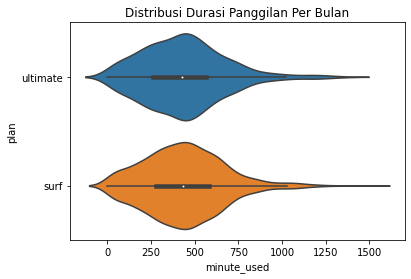

In [64]:
plt.title('Distribusi Durasi Panggilan Per Bulan')
sns.violinplot(data=df_merge, x='minute_used', y='plan');
plt.show()

Pengguna dikedua jenis paket data rata-rata menghabiskan durasi panggilan yang sama yaitu sekitar 500 menit. Dapat dilihat dalam tabel `violinplot` bahwa pengguna kedua jenis paket memiliki prilaku yang mirip.

#### Distribusi Volume Penggunaan Data Seluler <a id='dis_internet'></a>

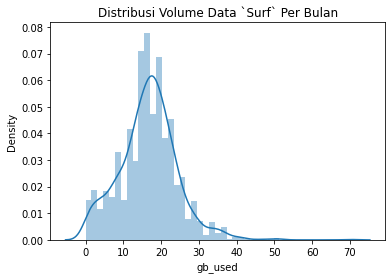

In [65]:
# Distribusi volume penggunaan data seluler

plt.title('Distribusi Volume Data `Surf` Per Bulan')
sns.distplot(surf['gb_used']);
plt.show()

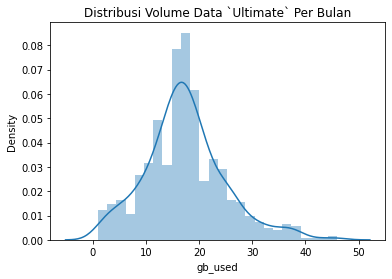

In [66]:
# Distribusi volume penggunaan data seluler

plt.title('Distribusi Volume Data `Ultimate` Per Bulan')
sns.distplot(ultimate['gb_used']);
plt.show()

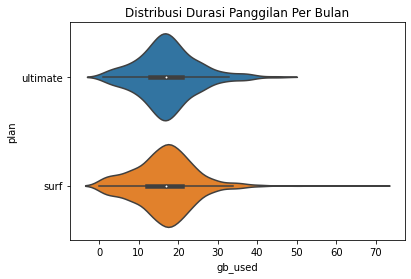

In [67]:
plt.title('Distribusi Durasi Panggilan Per Bulan')
sns.violinplot(data=df_merge, x='gb_used', y='plan');
plt.show()

Pengguna dikedua jenis paket data rata-rata menghabiskan volume penggunaan data seluler sama yaitu sekitar 18gb. sama seperti distribusi durasi panggilan dalam tabel `violinplot` dapat dilihat bahwa pengguna kedua jenis paket juga memiliki prilaku yang mirip namun pengguna paket `surf` memiliki nilai maksimal yang jauh lebih tinggi.

#### Distribusi Jumlah SMS <a id='dis_sms'></a>

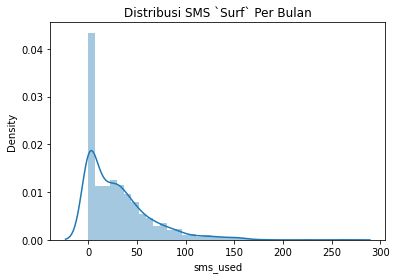

In [68]:
# Distribusi jumlah SMS

plt.title('Distribusi SMS `Surf` Per Bulan')
sns.distplot(surf['sms_used']);
plt.show()

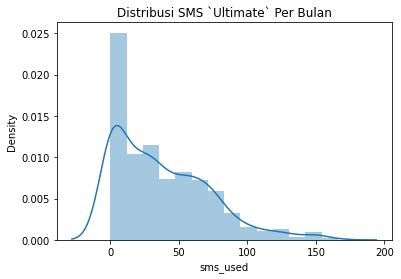

In [69]:
# Distribusi jumlah SMS

plt.title('Distribusi SMS `Ultimate` Per Bulan')
sns.distplot(ultimate['sms_used']);
plt.show()

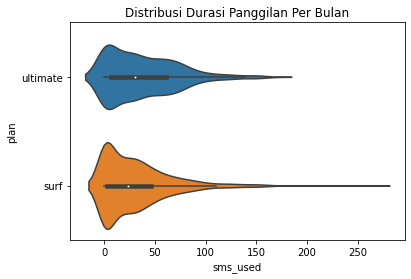

In [70]:
plt.title('Distribusi Durasi Panggilan Per Bulan')
sns.violinplot(data=df_merge, x='sms_used', y='plan');
plt.show()

Sama seperti sebelumnya, prilaku pengguna dikedua paket sangat mirip namun paket `surf` memiliki nilai maksimal yang jauh lebih tinggi.

### Varians, Rata-rata, dan Standar Deviasi <a id='var'></a>

#### Varians, Rata-rata, dan Standar Deviasi Panggilan <a id='var_call'></a>

In [71]:
pd.pivot_table(df_merge, index='plan', values='minute_used', aggfunc=['mean', np.var, np.std])

,mean,var,std
,minute_used,minute_used,minute_used
plan,,,
surf,436.519741,52571.063243,229.283805
ultimate,434.676017,56573.632247,237.852123


Kedua paket data memiliki varians, rata-rata, dan standar deviasi yang tidak jauh berbeda.

#### Varians, Rata-rata, dan Standar Deviasi Volume Data <a id='var_internet'></a>

In [72]:
pd.pivot_table(df_merge, index='plan', values='gb_used', aggfunc=['mean', np.var, np.std])

,mean,var,std
,gb_used,gb_used,gb_used
plan,,,
surf,16.620065,59.102317,7.687803
ultimate,17.370266,57.458216,7.580120


Kedua paket data memiliki varians, rata-rata, dan standar deviasi yang tidak jauh berbeda, uniknya rata-rata pengguna paket `surf` menghabiskan volume data melebihi batas yang disediakan.

#### Varians, Rata-rata, dan Standar Deviasi SMS <a id='var_sms'></a>

In [73]:
pd.pivot_table(df_merge, index='plan', values='sms_used', aggfunc=['mean', np.var, np.std])

,mean,var,std
,sms_used,sms_used,sms_used
plan,,,
surf,30.897735,1131.949380,33.644455
ultimate,37.725105,1210.143428,34.787116


Kedua paket data memiliki varians, rata-rata, dan standar deviasi yang tidak jauh berbeda.

### Kesimpulan <a id='con2'></a>

**Findings:**

- Pengguna dikedua jenis paket data rata-rata menghabiskan durasi panggilan yang sama yaitu sekitar 430 menit.
- Pengguna dikedua jenis paket data rata-rata menghabiskan volume data yang sama yaitu sekitar 17gb.
- Pengguna dikedua jenis paket data rata-rata menghabiskan jumlah SMS yang sama yaitu sekitar 30 SMS.
- Kedua paket data memiliki varians dan standar deviasi yang tidak jauh berbeda.
- Jumlah panggilan dan penggunaan volume data pengguna paket `surf` memiliki nilai maksimal yang jauh lebih tinggi.
- Rata-rata pengguna paket `surf` menghabiskan volume data melebihi batas yang disediakan.

**Insights:**

- Paket `surf` memiliki lebih banyak kemungkinan untuk melewati batas yang disediakan paket.

**Recomendation:**

- Mungkin dapat dipertimbangkan untuk membuat produk ditengah antara `surf` dan `ultimate` sebagai pertimbangan pelanggan. 

## Tahap 5: Menguji Hipotesis <a id='hip'></a>

Terdapat dua hipotesis yang perlu diuji:

- Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
- Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

### Hipotesis 1 <a id='hip1'></a>

- H0 (Null Hypothesis) = Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf **SAMA**.
- H1 (Alternative Hypothesis) = Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf **TIDAK SAMA**.

Sebelum menguji hipotesisnya, perlu dipastikan apakah varian tiap jenis paket adalah sama atau tidak:

In [74]:
# Memeriksa varian tiap jenis paket data

np.var(surf['total_charge']), np.var(ultimate['total_charge'])

(2863.9634227934766, 128.68585613992985)

Selisihnya sangat besar, dengan begitu `equal_var` dapat diset dengan nilai `False`.

Melakukan T-test dengan alpha 5%:

In [75]:
# Melakukan t-test

alpha = 0.05

results = st.ttest_ind(surf['total_charge'], ultimate['total_charge'], equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak dapat menolak hipotesis nol') 

p-value:  3.363644868810119e-17
Kita menolak hipotesis nol


H0 (Null Hypothesis) ditolak, artinya rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf adalah ***TIDAK SAMA***.

In [76]:
surf['total_charge'].mean() , ultimate['total_charge'].mean()

(60.125514563106805, 72.27769985974754)

Hal ini terbukti bahwa rata-rata pendapatan dari pengguna paket telepon `Surf` jauh lebih kecil dari rata-rata pendapatan dari pengguna paket telepon `Ultimate`.

### Hipotesis 2 <a id='hip2'></a>

- H0 (Null Hypothesis) = Rata-rata pendapatan dari pengguna di wilayah NY-NJ ***SAMA*** dengan pendapatan pengguna dari wilayah lain.
- H1 (Alternative Hypothesis) = Rata-rata pendapatan dari pengguna di wilayah NY-NJ ***TIDAK SAMA*** dengan pendapatan pengguna dari wilayah lain.

In [77]:
ny_nj = df_merge.loc[df_merge['is_ny_nj'] == True].reset_index()
not_ny_nj = df_merge.loc[df_merge['is_ny_nj'] == False].reset_index()
ny_nj.head()

,index,user_id,plan,sms_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_sms,usd_per_minute,plan_name,year_month,minute_used,gb_used,sms_used,city,is_ny_nj,gb_included,call_charge,internet_charge,sms_charge,total_extra_charge,total_charge
0,29,1031,ultimate,1000.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-07,304.0,11.0,1.0,NY-NJ-PA,True,30.0,0.0,0.0,0.0,0.0,70.0
1,30,1031,ultimate,1000.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-08,483.0,22.0,2.0,NY-NJ-PA,True,30.0,0.0,0.0,0.0,0.0,70.0
2,31,1031,ultimate,1000.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-09,515.0,13.0,3.0,NY-NJ-PA,True,30.0,0.0,0.0,0.0,0.0,70.0
3,32,1031,ultimate,1000.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-10,563.0,19.0,2.0,NY-NJ-PA,True,30.0,0.0,0.0,0.0,0.0,70.0
4,33,1031,ultimate,1000.0,3000.0,70.0,7.0,0.01,0.01,ultimate,2018-11,611.0,16.0,1.0,NY-NJ-PA,True,30.0,0.0,0.0,0.0,0.0,70.0


In [78]:
# Memeriksa varian tiap jenis paket data

np.var(ny_nj['total_charge']), np.var(not_ny_nj['total_charge'])

(1816.1923536678753, 2068.512049657869)

In [79]:
# Menghitung presentase perbedaan varians

(np.var(not_ny_nj['total_charge']) - np.var(ny_nj['total_charge'])) / np.var(not_ny_nj['total_charge']) * 100

12.198125509190392

Selisihnya sangat besar, dengan begitu `equal_var` dapat diset dengan nilai `False`.

Melakukan T-test dengan alpha 5%:

In [80]:
# Melakukan t-test

alpha = 0.05

results = st.ttest_ind(ny_nj['total_charge'], not_ny_nj['total_charge'], equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak dapat menolak hipotesis nol') 

p-value:  0.013118130086619653
Kita menolak hipotesis nol


H0 (Null Hypothesis) ditolak, artinya rata-rata pendapatan dari pengguna di wilayah NY-NJ ***TIDAK SAMA*** dengan pendapatan pengguna dari wilayah lain.

In [81]:
ny_nj['total_charge'].mean() , not_ny_nj['total_charge'].mean()

(58.866118598382755, 64.96480657127715)

Hal ini terbukti bahwa rata-rata pendapatan dari pengguna di wilayah NY-NJ lebih kecil dari rata-rata pendapatan dari pengguna di wilayah lain.

## Kesimpulan Umum <a id='end'></a>

*Dataset* yang dianalisa terdiri dari total 5 *dataset* yang berbeda. Ke-5 dataset telah di simpan ke dalam variabel yang berbeda:

1. `df_calls` — berisi data panggilan pelanggan.
2. `df_internet` — berisi data sesi web pelanggan.
3. `df_messages` — berisi data SMS pelanggan.
4. `df_plans` — berisi data data paket telepon pelanggan.
5. `df_users` — berisi data pengguna pelanggan.

Masing-masing dataset telah diolah dan dibersihkan sedemikian rupa sehingga aktivitas pengguna telah dikelompokan ke dalam bulan dan kemudian seluruh *dataset* digabungkan. Selanjutnya telah ditemukan total tagihan bulanan yang dibayarkan masing-masing pengguna hingga datanya telah siap untuk dianalisa lebih lanjut.

Tujuan utama adalah untuk mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan. Untuk menjawab pertanyaan tersebut penting untuk mengetahui beberapa hal berikut:

1. Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan.
2. Jumlah SMS yang dikirim per bulan.
3. Volume data per bulan.
4. Pendapatan bulanan dari setiap pengguna.

Selanjutnya perlu juga dilakukan pengujian **hipotesis** berikut:

1. Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
2. Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

Setelah menganalisis datanya, dapat disimpulkan bahwa:

- Hipotesis pertama dapat diterima karena berdasarkan T-test yang dilakukan bahwa rata-rata pendapatan dari pengguna paket telepon `Ultimate` dan `Surf` memang berbeda, dan paket `Ultimate` memiliki rata-rata yang jauh lebih besar.
- Berdasarkan T-test, hipotesis kedua juga dapat diterima yaitu rata-rata pendapatan dari pengguna di wilayah `NY-NJ` berbeda dengan pendapatan pengguna dari wilayah lain dan cenderung lebih kecil.
- Paket `surf` memiliki lebih banyak kecenderungan untuk melewati batas yang disediakan paket, namun paket `Ultimate` memiliki rata-rata pendapatan lebih besar


[Kembali ke Daftar Isi](#back)